# Document Similarity (English)

In this notebook, you will use the DocumentSimilarity tool to identify similar documents in the English language and decide whether to keep or remove them from the corpus.  

**Note:** this tool uses [MinHash](https://ekzhu.com/datasketch/minhash.html) to estimate the Jaccard similarity between sets of documents. MinHash is introduced by Andrei Z. Broder in this [paper](https://cs.brown.edu/courses/cs253/papers/nearduplicate.pdf).

<div class="alert alert-block alert-warning">
<b>Jupyter Notebook User Guide</b> 

If you are new to Jupyter Notebook, feel free to take a quick look at [this user guide](documents/jupyter-notebook-guide.pdf) for basic information on how to use a notebook.
</div>

### Document Similarity User Guide

For instructions on how to use the Document Similarity tool, please refer to the [Document Similarity User Guide](documents/docsim-help-pages.pdf).

## 1. Setup
Before you begin, you need to import the DocumentSimilarity package and the necessary libraries and initiate them to run in this notebook.

In [1]:
# import the DocumentSimilarity tool
print('Loading DocumentSimilarity...')
from atap_corpus_loader import CorpusLoader
from document_similarity import DocumentSimilarity

# initialize the DocumentSimilarity
ds = DocumentSimilarity()
print('Finished loading.')

Loading DocumentSimilarity...


Loading BokehJS ...

Finished loading.


## 2. Load the data
This notebook will allow you to upload text data in a text file (or a number of text files). Alternatively, you can also upload text inside a text column inside your excel spreadsheet ([see an example here](https://github.com/Sydney-Informatics-Hub/HASS-29_Quotation_Tool/blob/main/documents/sample_texts.xlsx)).  

<table style='margin-left: 10px'><tr>
<td> <img src='./img/txt_icon.png' style='width: 45px'/> </td>
<td> <img src='./img/xlsx_icon.png' style='width: 55px'/> </td>
<td> <img src='./img/csv_icon.png' style='width: 45px'/> </td>
<td> <img src='./img/zip_icon.png' style='width: 45px'/> </td>
</tr></table>

<div class="alert alert-block alert-warning">
<b>Uploading your text files</b> 
    
If you have a large number of text files (more than 10MB in total), we suggest you compress (zip) them and upload the zip file instead. If you need assistance on how to compress your file, please check [the user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for more info. 
</div>

<div class="alert alert-block alert-danger">
<b>File upload</b> 
    
You can simply drag and drop your file to the top left pane
</div>

In [2]:
corpus_loader = CorpusLoader(".")
corpus_loader.set_build_callback(ds.set_text_df, corpus_loader)
corpus_loader.servable()

NotificationArea()

Tabs
    [0] Row
        [0] Column
            [0] Column(width=700)
                [0] Row
                    [0] Button(button_type='primary', name='Select all', width=95)
                [1] Row
                    [0] TextInput(placeholder='Filter displayed f..., sizing_mode='stretch_width')
                    [1] Column
                        [0] Checkbox(name='Show hidden')
                        [1] Checkbox(name='Expand archives')
                    [2] Select(options=['All valid filetypes', ...], value='All valid filetypes', width=150)
                [2] Row
                    [0] MultiSelect(options={'./data/Diabetes_all_utf8...}, size=20, sizing_mode='stretch_width')
            [1] Row(width=700)
                [0] Column
                    [0] Row
                        [0] Button(button_style='outline', button_type='success', name='Load as corpus', width=130)
                        [1] Button(button_style='outline', button_type='success', name='Load as metadata', width=130)
                    [1] Row
                        [0] TextInput(placeholder='Corpus name', visible=False, width=150)
                        [1] Button(button_type='success', name='Build corpus', visible=False)
                    [2] Row
                        [0] Tqdm(layout=Column, progress=Progress, text_pane=Str, visible=False)
                [1] Markdown(str)
                [2] HSpacer()
                [3] Button(button_style='outline', button_type='danger', disabled=True, name='Unload selected', width=100)
                [4] Button(button_type='danger', disabled=True, name='Unload all', width=100)
        [1] Spacer(width=50)
        [2] Column
            [0] Markdown(str, visible=False)
            [1] Row
                [0] Select(visible=False, width=200)
                [1] ParamFunction(function, _pane=Str, defer_load=False)
            [2] GridBox(ncols=3, styles={'border': '1px dashed bla...}, visible=False)
                [0] Markdown(str)
                [1] Markdown(str)
                [2] Markdown(str, align='center')
            [3] Spacer(height=20)
            [4] Row(styles={'border': '1px solid red'...}, visible=False)
                [0] Select(options=[''], width=200)
                [1] Str(str, styles={'font-size': '2em', ...})
                [2] Select(options=[''], width=200)
                [3] Column(visible=False)
                    [0] ParamFunction(function, _pane=Str, defer_load=False)
                [4] Column(visible=False)
                    [0] ParamFunction(function, _pane=Str, defer_load=False)
            [5] Spacer(height=20)
            [6] Markdown(str, visible=False)
            [7] GridBox(ncols=3, styles={'border': '1px dashed bla...}, visible=False)
                [0] Markdown(str)
                [1] Markdown(str)
                [2] Markdown(str, align='center')
    [1] Row
        [0] Accordion(active_header_background='#7A8B99', header_background='#FFFFFA', toggle=True, width=600)
        [1] Markdown(None)

<div class="alert alert-block alert-warning">
<b>Automatic deduplication of identical documents within the corpus</b> 

The Document Similarity Tool is designed to find the documents in your corpus that are similar, but not 100% identical. As a first step, the tool will therefore aim to identify all identical documents in the corpus and undertake an automatic deduplication. For these identical documents, only the first document (according to alphabetical order by “text_name” or filename) will be retained in the corpus. The Jaccard-based similarity analysis below is then only run on the deduplicated version of the corpus to avoid including identical documents in the pairwise display. You can see the names of all identical documents in your corpus by executing the following cell, which allows you to export the relevant table as a CSV file. This table provides the filename of the retained file in the ‘kept’ column and the file names of the relevant identical (excluded) files in subsequent numbered columns. For example, the column ‘1’ contains the file name of the first duplicate of the file in the ‘kept’ column, and so on – this depends on the number of duplicates identified.

</div>

In [3]:
ds.identical_docs()

No identical document is found in the corpus.


In [4]:
# display uploaded text
n=5

ds.text_df.head()

,text,text_name,text_id
0,"A Tall, agreeable woman, not with very regular...","1761_Bet Anſon, Prince’s-Street, Leiceſter-Fields",-5599130183791181038
27,"A little diminitive, ſmirking, letcheros huſſs...","1761_Bet Ellis, Chandois-Street.",-6809801537499121142
50,She has been truly a line woman. Her figure is...,"1761_Bet North, Oxenden-ſtreet.·",5129775816764801825
10,Perhaps this lady ſhould rather be ranked amon...,"1761_Bet. Bewley, Parliament-Street.",-889442956435623164
4,A very pretty agreeable little Hibernian; but ...,"1761_Bet. Blaney, Katharine-Street, Strand.",7799248048187525241


## 3. Calculate Document Similarity
Once your texts have been uploaded, you can begin to calculate the similarity between documents in the corpus. 

<div class="alert alert-block alert-info">
<b>Tools:</b>    

- MinHash: fast implementation of estimating Jaccard similarity between documents in the corpus.  
- Gensim: to tokenize the text.  
    
<b>Note:</b> in general, Gensim splits the text whenever whitespace or punctuation is encountered and digits are excluded, e.g., the text "Here's to victory no 2" will be tokenized into five tokens: "Here", "s", "to", "victory" and "no". For more information, please visit [this page](https://radimrehurek.com/gensim/utils.html#gensim.utils.tokenize).
</div>

<div class="alert alert-block alert-danger">
<b>Memory limitation in Binder</b> 
    
The free Binder deployment is only guaranteed a maximum of 2GB memory. Processing very large text files may cause the session (kernel) to re-start due to insufficient memory. Check [the user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for more info. 
</div>

<div class="alert alert-block alert-warning">
<b>Parameters for calculating similarity</b> 
    
The DocumentSimilarity tool uses Jaccard similarity to measure the similarity between documents. In the code below, we have specified and explained the default parameters for calculating the Jaccard similarity. However, you can also change these parameters should you wish. 
</div>

In [9]:
# USER SPECIFIES THESE VARIABLES
# set the n-gram size (the number of words used to detect similarity), 
# e.g., n-gram=1 means compare every word ('apple' and 'orange'), 
# n-gram=2 means compare every pair of words ('one apple' and 'two oranges'), etc.
ngram_value = 4

# select whether to calculate actual or estimated Jaccard similarity 
# to measure the similarity between documents 
# we recommend using estimated Jaccard similarity for large corpus of documents (faster)
actual_jaccard = False # True or False

# whether to exclude punctuations when calculating Jaccard similarity
ds.exclude_punc = True # True or False

# set the number of permutation functions (num_perm) parameter for estimating Jaccard similarity
# higher permutation functions improves the accuracy, but also increases query cost
num_perm = 256

# anything with >= the cutoff will be identified as similar documents
similarity_cutoff = 0 # value should be between 0-1

In [10]:
# begin the process of calculating similarity and identify similar documents
ds.calculate_similarity(ngram_value, num_perm, similarity_cutoff, actual_jaccard)

638 pair of similar documents found in the corpus.


In [10]:
H = dict()
names = ds.text_df.text_name.tolist()
for name in names:
    H[name] = dict()
for i in range(20):
    ds.calculate_similarity(ngram_value, num_perm, similarity_cutoff, actual_jaccard)
    for name in ds.text_df.text_name.tolist():
        H[name][i] = ds.text_df[ds.text_df['text_name'] == 'A13N002']['hash'].values[0]

for n1 in names:
    for n2 in names:
        print(n1, n2)
        u = H[n1][0].jaccard(H[n2][0])
        for i in range(20):
            for j in range(20):
                v = H[n1][i].jaccard(H[n2][j])
                if u != v:
                    print(i, j, u, v)
        

AttributeError: 'DataFrame' object has no attribute 'text_name'

## 3. Analyse similar documents
Once the tool has finished calculating the document similarity, you can begin to analyse the outcome.  

The graph below is a histogram of the count of similar documents in the corpus as measured by their Jaccard similarity. In this histogram, you can identify how many documents are found at different level of similarity measures.

<div class="alert alert-block alert-warning">
<b>Histogram of similar documents</b> 
    
The x-axis on the histogram shows the Jaccard similarity scores for every document in the corpus, and the y-axis (the height of the bar) tells us how many similar documents are found at those Jaccard similarity score ranges. 
</div>

<Axes: title={'center': 'Similarity count across the entire corpus'}, xlabel='Jaccard similarity score', ylabel='No. of similar documents'>

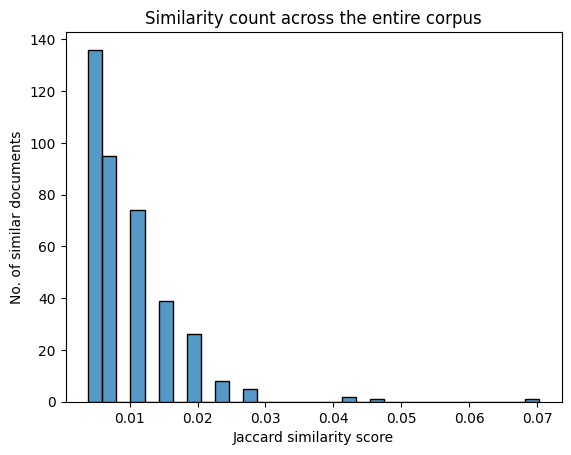

In [11]:
# plot the similarity count accross the entire corpus
ds.plot_hash_similarity_by_source(ds.deduplication_df)

<div class="alert alert-block alert-warning">
<b>Heatmap of similar documents</b> 
    
The below heatmap shows the Jaccard similarity scores between pair of similar documents, with the x- and y-axes showing the text_id of the similar document pairs (you can hover over the similar nodes to display the text name pairs). Please note that the heatmap only displays pair of similar documents with scores above the similarity cut-off, as defined earlier.  
</div>  

<div class="alert alert-block alert-danger">
<b>Large number of similar documents</b> 
    
You can resize the heatmap, adjust the font size or the font color to better visualize your data by specifying the below parameters. You can also zoom in/out of the heatmap, move it around, save and download it to your local computer using the interactive tool on the right hand-side of the heatmap.  

<b>Note:</b> visualizing a large number of similar document pairs (**>500**) may slow down the notebook.   
</div>
<div class="alert alert-block alert-info">
<b>Input before plotting</b> 
    
To avoid plotting oversized figure, the user is asked to **specify the range** of matched documents to be included in the heatmap.
Entering **'n'** will cancel the figure generation.
Entering **'y'** will proceed with **all pairs** of similar documents.
Entering an **integer number**, such 30, will generate the figure with the top-30 pairs of the similar documents.
Entering a number range like **15-45** will generate the figure with the selected range (15 to 45) of the document pairs.
    
**Press Enter Key after inputting.**
</div>

In [13]:
# define the plot width, height, font size and color
plot_width = 900 # increase plot width if necessary
plot_height = 800 # increase plot height if necessary
font_size = '14px'
text_color = 'white' # 'black' or 'white' would usually work for most scenarios

print('\033[1mVisualizing a large number of similar document pairs (>500) may slow down the notebook.\033[0m')
print('There are \033[1m{}\033[0m document pairs in the current process'.format(ds.deduplication_df.shape[0]))
plot_range = input("""Enter the range of documents pairs to be plotted, e.g. y, n, 10-25, or 30.""")

# plot heatmap of Jaccard similarity
ds.plot_heatmap_similarity(similarity_cutoff,
                                plot_width,
                                plot_height,
                                font_size,
                                text_color,
                                plot_range)

Visualizing a large number of similar document pairs (>500) may slow down the notebook.
There are 638 document pairs in the current process


Enter the range of documents pairs to be plotted, e.g. y, n, 10-25, or 30. 50



You can hover over the similar nodes to display the text name pairs.



<div class="alert alert-block alert-warning">
<b>Analyse similar documents</b> 

Below you can generate a list of similar documents (in pairs) found by the tool, based on the similarity cutoff specified earlier. By default, the tool makes recommendations on whether to 'keep' or 'remove' each similar document (the tool will recommend to remove the document with the lower word count, if the Jaccard similarity is above the specified threshold). However, using the below tool, you can generate each pair of similar documents (by specifying the row index you wish to analyse), analyse them, and update the action/recommendation as you see fit.
</div>

<div class="alert alert-block alert-danger">
<b>Similar documents table</b> 

The table below displays only those texts identified as similar based on the Jaccard similarity cut-off selected earlier and the number of texts included in the table display therefore also informs you how many texts in your corpus are identified as within the cut-off threshold.
</div>

In [14]:
ds.display_deduplication_text()

<div class="alert alert-block alert-warning">
<b>What information is included in the above table?</b> 

**text_id1/2:** the text id of the pair of similar documents.
    
**text_name1/2:** the text name of the pair of similar documents.
   
**word_count1/2:** the word count of the pair of similar documents.

**status1/2:** whether to 'keep' or 'remove' each similar document.

**similarity:** the Jaccard similarity between the pair of similar documents.
</div>

<div class="alert alert-block alert-danger">
<b>Caveat: Discrepency in the highlighted side-by-side comparison</b> 
In the display of document pairs where differences between texts are highlighted for checking by users, only document pairs based on the Jaccard similarity parameters are included. However, this visualisation uses the python function difflib which is independent from the Jaccard calculation and may thus highlight differences in punctuation (regardless of previous settings) and this function may also at times contain incorrectly highlighted text blocks. Despite this caveat, the visualisation should still be helpful in allowing you to decide which of the two texts you want to ‘keep’ or ‘remove’.
</div>

## 5. Save duplicated/non-duplicated texts
Once you are happy with the list of texts that you want to keep, you can run the below code to save the non-duplicated texts (those with 'keep' status) or the duplicated ones (those with 'remove' status) into a zip of text (.txt) files and download them to your local computer.

In [ ]:
rows_to_display=5

ds.finalise_and_save(rows_to_display)

In [ ]:
rows_to_display=5

ds.finalise_and_save(rows_to_display)

In [ ]:
df = ds.deduplication_df
df[~df[['text_id1', "similarity"]].duplicated()]

In [ ]:
data=(df[
            # return single row for article_id and similarity_score,
            # so one row per article for this plot    
            ~df[['text_id1', "similarity"]]
            .duplicated()])
data

In [ ]:
import seaborn as sns
sns.histplot(data=(df[
            # return single row for article_id and similarity_score,
            # so one row per article for this plot    
            ~df[['text_id1', "similarity"]]
            .duplicated()]), x="similarity")

In [ ]:
corpus = corpus_loader.get_corpus()

In [ ]:
corpus.add_dtm_from_docs(lambda t: t.split(), name='token')

In [ ]:
corpus.dtms['token']

In [ ]:
ds.text_df

In [ ]:
ds.deduplicated_text_df.shape

In [ ]:
ds.duplicated_text_df.shape

In [ ]:
ds.dup_df.groupby('text_id')

In [ ]:
ds.dup_df.head()